In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../data/Bay Area/Water Level - San Francisco.csv')

data.head()

,Date,Time (GMT),Predicted (ft),Verified (ft)
0,1/1/2023,0:00,2.111,2.92
1,1/1/2023,1:00,2.828,3.61
2,1/1/2023,2:00,3.463,4.19
3,1/1/2023,3:00,3.833,4.57
4,1/1/2023,4:00,3.829,4.53


In [2]:
import numpy as np

# Convert the 'Date' column to datetime type and extract day of week
data['Date'] = pd.to_datetime(data['Date'])
data['Day of Week'] = data['Date'].dt.day_name()

# Group the data by 'Day of Week' and 'Time (GMT)', and calculate the average verified water level
grouped_data = data.groupby(['Day of Week', 'Time (GMT)'])['Verified (ft)'].mean().unstack()

# Reorder the index to start the week from Monday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data = grouped_data.reindex(day_order)

# Display the reshaped data
grouped_data


Time (GMT),0:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,...,22:00,23:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00
Day of Week,,,,,,,,,,,,,,,,,,,,,
Monday,3.043714,3.843143,3.637714,3.463714,3.361286,3.352571,3.448286,3.615143,3.800571,3.956429,...,3.465714,3.208714,3.021429,3.185429,3.436429,3.700286,3.934571,4.081714,4.105143,4.010714
Tuesday,2.998551,3.797246,3.588406,3.408986,3.332319,3.325362,3.436957,3.618261,3.799710,3.954348,...,3.494058,3.230145,2.964348,3.132174,3.401304,3.677971,3.921304,4.066812,4.091014,3.983623
Wednesday,3.019710,3.810290,3.599275,3.432609,3.339710,3.342029,3.438841,3.622609,3.797681,3.931449,...,3.488841,3.236957,2.968696,3.138841,3.392754,3.692174,3.934783,4.080580,4.100145,3.994928
Thursday,3.044348,3.824638,3.604348,3.418406,3.320870,3.331739,3.441739,3.619420,3.805072,3.937681,...,3.443768,3.206957,2.992754,3.138551,3.395362,3.688261,3.942029,4.104783,4.118261,4.023913
Friday,3.023623,3.833623,3.609275,3.432754,3.324638,3.325797,3.441449,3.612754,3.796667,3.943913,...,3.442464,3.206232,2.975507,3.118116,3.364348,3.658696,3.906667,4.070580,4.114638,4.019565
Saturday,3.017391,3.840725,3.608261,3.411739,3.311884,3.307246,3.424348,3.616957,3.819130,3.973043,...,3.491449,3.233768,2.984638,3.134058,3.357246,3.635362,3.896232,4.061014,4.107536,4.016522
Sunday,3.045000,3.840000,3.640857,3.453286,3.350571,3.349429,3.445714,3.630429,3.824429,3.975286,...,3.485429,3.225429,3.022143,3.181714,3.411000,3.666714,3.910571,4.057429,4.094571,4.008286


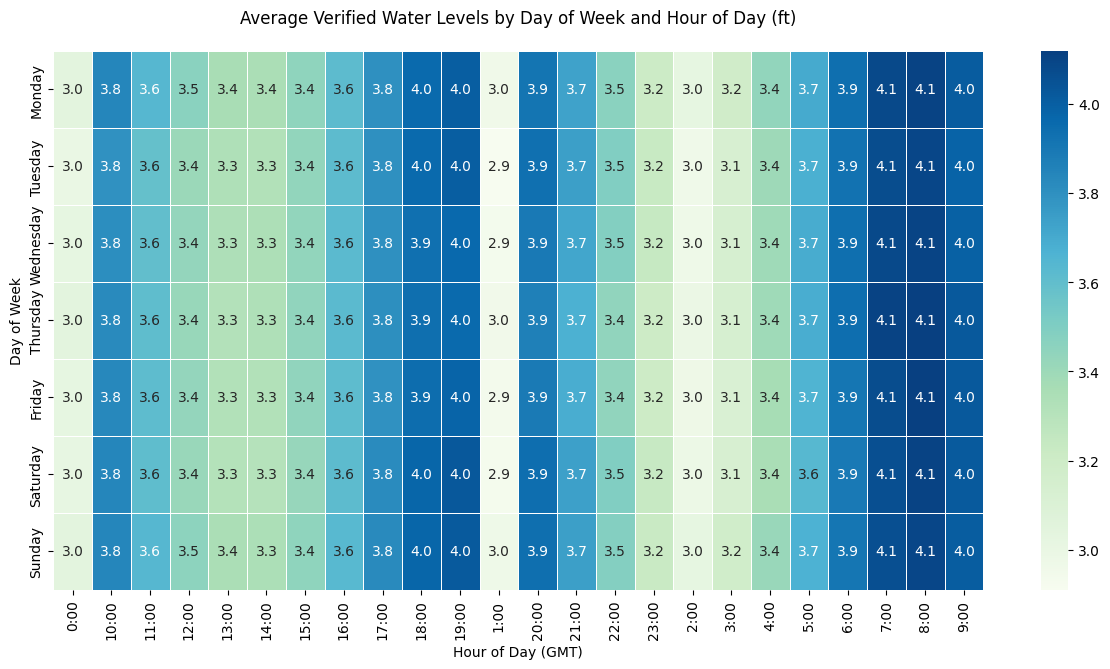

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(15, 7))
heatmap = sns.heatmap(grouped_data, cmap="GnBu", annot=True, fmt=".1f", linewidths=.5)
heatmap.set_title('Average Verified Water Levels by Day of Week and Hour of Day (ft)', pad=20)
plt.xlabel('Hour of Day (GMT)')
plt.ylabel('Day of Week')
plt.show()


In [4]:
# Extract month and hour from the data
data['Month'] = data['Date'].dt.month_name()
data['Hour'] = data['Time (GMT)']

# Group the data by 'Month' and 'Hour', and calculate the average verified water level
monthly_avg_data = data.groupby(['Month', 'Hour'])['Verified (ft)'].mean().unstack()

# Reorder the index by month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_data = monthly_avg_data.reindex(month_order)

# Display the reshaped data
monthly_avg_data


Hour,0:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,...,22:00,23:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00
Month,,,,,,,,,,,,,,,,,,,,,
January,2.119839,4.481613,4.627419,4.714355,4.776452,4.792742,4.809194,4.825806,4.793065,4.690968,...,3.038387,2.515000,1.756129,1.826613,2.072581,2.480806,2.961452,3.451129,3.887581,4.226452
February,2.168070,4.712456,4.581228,4.389474,4.200877,4.083860,4.039825,4.085439,4.109825,4.117368,...,2.921228,2.508772,1.985614,2.178070,2.526842,3.019825,3.564737,4.088421,4.472632,4.674386
March,2.576774,4.640806,4.337258,4.027742,3.776613,3.646290,3.605645,3.656290,3.701613,3.700806,...,2.893065,2.685323,2.756290,3.077258,3.486935,3.970484,4.416129,4.748548,4.892903,4.854839
April,2.830169,4.128475,3.703390,3.345932,3.088644,2.937797,2.891017,2.934237,2.993051,3.049492,...,2.838644,2.800678,3.267458,3.649661,4.095932,4.500678,4.792881,4.905593,4.818983,4.518136
May,3.481613,3.585484,3.063226,2.632903,2.332258,2.178710,2.190000,2.308710,2.457097,2.643871,...,3.106774,3.271290,4.181290,4.558710,4.910968,5.149032,5.201935,5.041290,4.674839,4.159355
June,4.265000,3.166333,2.638000,2.197333,1.886333,1.721000,1.735000,1.877667,2.150000,2.466667,...,3.762667,4.024000,4.764667,4.963000,5.108667,5.114000,4.994000,4.678000,4.253333,3.730667
July,4.617419,2.802258,2.265806,1.820323,1.554839,1.463548,1.589677,1.884839,2.352581,2.831935,...,4.346129,4.497419,4.784839,4.830323,4.877419,4.834194,4.672258,4.351935,3.905161,3.364516
August,4.520645,2.827097,2.301935,1.898387,1.704194,1.730645,2.019032,2.488065,3.074194,3.676452,...,4.799677,4.660323,4.318065,4.340968,4.396452,4.437742,4.413226,4.227742,3.889355,3.381935
September,3.896000,2.762667,2.441667,2.262000,2.271333,2.503000,2.936667,3.463667,4.038667,4.537000,...,4.628000,4.246333,3.512000,3.513333,3.599333,3.674667,3.691000,3.606333,3.402333,3.107000


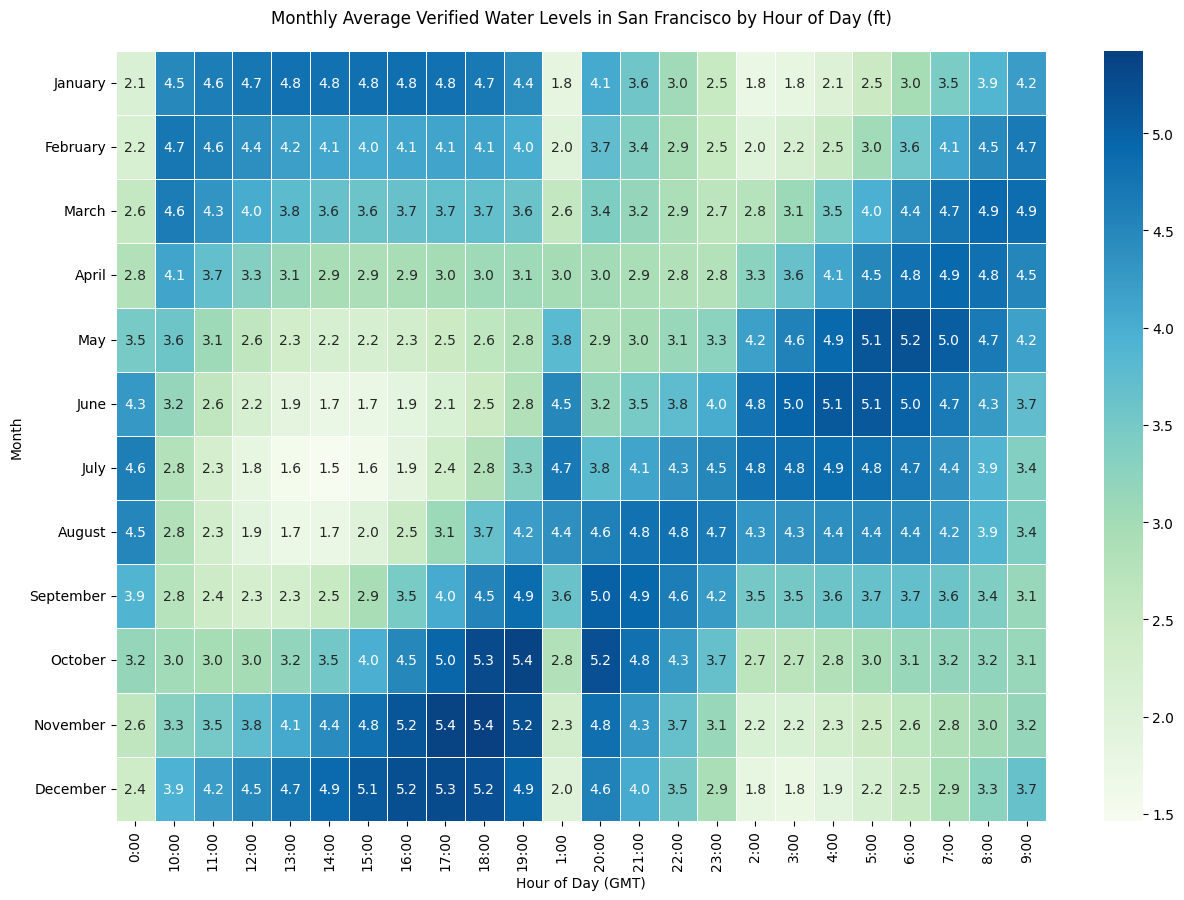

In [6]:
# Plotting the heatmap for monthly average data
plt.figure(figsize=(15, 10))
monthly_heatmap = sns.heatmap(monthly_avg_data, cmap="GnBu", annot=True, fmt=".1f", linewidths=.5)
monthly_heatmap.set_title('Monthly Average Verified Water Levels in San Francisco by Hour of Day (ft)', pad=20)
plt.xlabel('Hour of Day (GMT)')
plt.ylabel('Month')
plt.show()
